In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
###############################################################################
################ COMPARE DISTRIBUTION OF 10-MIN AND 3-SEC ALPHA  ##############
###############################################################################

#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as mpyplot
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              


print("done importing modules")


done importing modules


In [2]:
#%% Define file locations
WRF_DIRECTORY_26 = "/pl/active/JKL_IDEAL/hurricanes/sst_26/"
WRF_DIRECTORY_28 = "/pl/active/JKL_IDEAL/hurricanes/sst_28/" 
WRF_DIRECTORY_30 = "/pl/active/JKL_IDEAL/hurricanes/sst_30/"  
WRF_DIRECTORY_32 = "/pl/active/JKL_IDEAL/hurricanes/sst_32/"  #"/rc_scratch/misa5952/hurricanes/nudge_sst_32/"   
WRF_DIRECTORY_34 = "/pl/active/JKL_IDEAL/hurricanes/sst_34/" #"/rc_scratch/misa5952/hurricanes/sst_34_NBA/"  

fileName = 'alpha_distr.txt'

dirFig = "/pl/active/JKL_IDEAL/hurricanes/Figures/"


In [3]:
#%% Extract pdf for yaw misalignment
file_26 = np.loadtxt(WRF_DIRECTORY_26+fileName,delimiter=',')
binnss_26 = file_26[:,0]
hist_26 = file_26[:,1:] # [3-sec, 10-min]

file_28 = np.loadtxt(WRF_DIRECTORY_28+fileName,delimiter=',')
binnss_28 = file_28[:,0]
hist_28 = file_28[:,1:] # [3-sec, 10-min]

file_30 = np.loadtxt(WRF_DIRECTORY_30+fileName,delimiter=',')
binnss_30 = file_30[:,0]
hist_30 = file_30[:,1:] # [3-sec, 10-min]

file_32 = np.loadtxt(WRF_DIRECTORY_32+fileName,delimiter=',')
binnss_32 = file_32[:,0]
hist_32 = file_32[:,1:] # [3-sec, 10-min]

file_34 = np.loadtxt(WRF_DIRECTORY_34+fileName,delimiter=',')
binnss_34 = file_34[:,0]
hist_34 = file_34[:,1:] # [3-sec, 10-min]


In [4]:
#%% Colors for each case
col_26 = 'steelblue'
col_28 = 'tab:green'
col_30 = 'goldenrod'
col_32 = 'firebrick'
col_34 = 'tab:purple'
cols = [col_26,col_28,col_30,col_32,col_34]


In [5]:
#%% Eyewall for each case
r_eye_26 = 13805
r_eye_28 = 21300
r_eye_30 = 20333
r_eye_32 = 27055
r_eye_34 = 33638.915


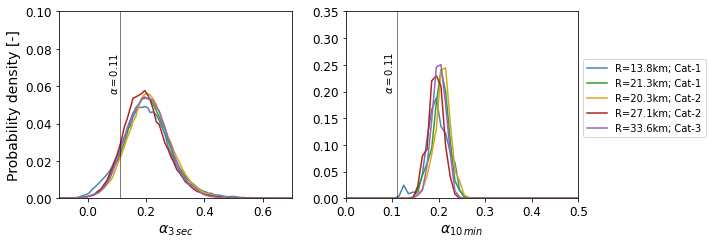

In [16]:
mpyplot.figure(figsize=(10,3.5))
# 3-sec alpha
mpyplot.subplot(1,2,1)
mpyplot.plot(binnss_26,hist_26[:,0],color=col_26)
mpyplot.plot(binnss_28,hist_28[:,0],color=col_28)
mpyplot.plot(binnss_30,hist_30[:,0],color=col_30)
mpyplot.plot(binnss_32,hist_32[:,0],color=col_32)
mpyplot.plot(binnss_34,hist_34[:,0],color=col_34)
mpyplot.plot([0.11,0.11],[0,1],'-k',linewidth=0.5)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(-0.1,0.7)
mpyplot.ylim(0,0.1)
mpyplot.text(0.07,0.057,s=r"$\alpha=0.11$",rotation=90)
mpyplot.xlabel(r'$\alpha_{3\, sec}$',fontsize=14)
mpyplot.ylabel('Probability density [-]',fontsize=14)

# 10-min alpha
mpyplot.subplot(1,2,2)
mpyplot.plot(binnss_26,hist_26[:,1],color=col_26,label='R='+str(np.round(r_eye_26/1000,1))+'km; Cat-1')
mpyplot.plot(binnss_28,hist_28[:,1],color=col_28,label='R='+str(np.round(r_eye_28/1000,1))+'km; Cat-1')
mpyplot.plot(binnss_30,hist_30[:,1],color=col_30,label='R='+str(np.round(r_eye_30/1000,1))+'km; Cat-2')
mpyplot.plot(binnss_32,hist_32[:,1],color=col_32,label='R='+str(np.round(r_eye_32/1000,1))+'km; Cat-2')
mpyplot.plot(binnss_34,hist_34[:,1],color=col_34,label='R='+str(np.round(r_eye_34/1000,1))+'km; Cat-3')
mpyplot.plot([0.11,0.11],[0,1],'-k',linewidth=0.5)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(0,0.5)
mpyplot.ylim(0,0.35)
mpyplot.text(0.08,0.2,s=r"$\alpha=0.11$",rotation=90)
mpyplot.xlabel(r'$\alpha_{10\, min}$',fontsize=14)
mpyplot.legend(loc=3,ncol=1,bbox_to_anchor=[1, 0.3])

mpyplot.tight_layout()

mpyplot.savefig(dirFig + "alpha_pdf.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')


In [7]:
# Percent of cases that exceed threshold

thres = 0.11 # 15 8

temp_26 = np.nansum(hist_26[binnss_26>thres,:],axis=0)
mean_26 = [np.nansum(hist_26[:,0]*binnss_26),np.nansum(hist_26[:,1]*binnss_26)]
print('Percent of cases above threshold for 3-sec and 10-min profiles is ' + str(100*temp_26))
print('Mean alpha for 3-sec and 10-min profiles is ' + str(mean_26))
print('---')

temp_28 = np.nansum(hist_28[binnss_28>thres,:],axis=0)
mean_28 = [np.nansum(hist_28[:,0]*binnss_28),np.nansum(hist_28[:,1]*binnss_28)]
print('Percent of cases above threshold for 3-sec and 10-min profiles is ' + str(100*temp_28))
print('Mean alpha for 3-sec and 10-min profiles is ' + str(mean_28))
print('---')


temp_30 = np.nansum(hist_30[binnss_30>thres,:],axis=0)
mean_30 = [np.nansum(hist_30[:,0]*binnss_30),np.nansum(hist_30[:,1]*binnss_30)]
print('Percent of cases above threshold for 3-sec and 10-min profiles is ' + str(100*temp_30))
print('Mean alpha for 3-sec and 10-min profiles is ' + str(mean_30))
print('---')

temp_32 = np.nansum(hist_32[binnss_32>thres,:],axis=0)
mean_32 = [np.nansum(hist_32[:,0]*binnss_32),np.nansum(hist_32[:,1]*binnss_32)]
print('Percent of cases above threshold for 3-sec and 10-min profiles is ' + str(100*temp_32))
print('Mean alpha for 3-sec and 10-min profiles is ' + str(mean_32))
print('---')

temp_34 = np.nansum(hist_34[binnss_34>thres,:],axis=0)
mean_34 = [np.nansum(hist_34[:,0]*binnss_34),np.nansum(hist_34[:,1]*binnss_34)]
print('Percent of cases above threshold for 3-sec and 10-min profiles is ' + str(100*temp_34))
print('Mean alpha for 3-sec and 10-min profiles is ' + str(mean_34))
print('---')


Percent of cases above threshold for 3-sec and 10-min profiles is [86.0421111  99.98071615]
Mean alpha for 3-sec and 10-min profiles is [0.20071235732967002, 0.19627032336599598]
---
Percent of cases above threshold for 3-sec and 10-min profiles is [ 89.93685872 100.        ]
Mean alpha for 3-sec and 10-min profiles is [0.20655858890517595, 0.2025523593415273]
---
Percent of cases above threshold for 3-sec and 10-min profiles is [ 91.58982557 100.        ]
Mean alpha for 3-sec and 10-min profiles is [0.2121607096976797, 0.20803726911987275]
---
Percent of cases above threshold for 3-sec and 10-min profiles is [ 89.10494174 100.        ]
Mean alpha for 3-sec and 10-min profiles is [0.19665046270278433, 0.19319105691056973]
---
Percent of cases above threshold for 3-sec and 10-min profiles is [ 90.55364889 100.        ]
Mean alpha for 3-sec and 10-min profiles is [0.20433421516754913, 0.20081414748081478]
---


In [8]:
# 95th percentile of distributions

# Function that finds bin for ith percentile
def fun_perc(binss,pdf,ith):
    summ =  0
    bin_perc = binss[0]
    for i in np.flip(np.arange(len(pdf))):
        if summ<ith:
            summ += pdf[i]
            bin_perc = binss[i]
    return bin_perc
            


In [9]:
# Find mean bin for i-th percentile
iith = 1-0.95

print('26C')
print(fun_perc(binnss_26,hist_26[:,0],iith))
print(fun_perc(binnss_26,hist_26[:,1],iith))
print('----')

print('28C')
print(fun_perc(binnss_28,hist_28[:,0],iith))
print(fun_perc(binnss_28,hist_28[:,1],iith))
print('----')

print('30C')
print(fun_perc(binnss_30,hist_30[:,0],iith))
print(fun_perc(binnss_30,hist_30[:,1],iith))
print('----')

print('32C')
print(fun_perc(binnss_32,hist_32[:,0],iith))
print(fun_perc(binnss_32,hist_32[:,1],iith))
print('----')

print('34C')
print(fun_perc(binnss_34,hist_34[:,0],iith))
print(fun_perc(binnss_34,hist_34[:,1],iith))
print('----')



26C
0.35500000000000076
0.23500000000000065
----
28C
0.34500000000000075
0.23500000000000065
----
30C
0.34500000000000075
0.23500000000000065
----
32C
0.32500000000000073
0.21500000000000064
----
34C
0.32500000000000073
0.22500000000000064
----
